# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import get_data_home
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

C:\Users\CLAUDIOCLEMENTE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\CLAUDIOCLEMENTE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
#https://stackoverflow.com/questions/51301570/fetch-mldata-how-to-manually-set-up-mnist-dataset-when-source-server-is-down

### Now take a look at the shapes of the X and y matricies 

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [6]:
X[36000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

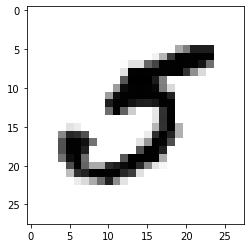

In [7]:

plt.imshow(X[36000].reshape(28,28),cmap = matplotlib.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [8]:
y[36000]

5.0

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [9]:
X_train = X[0:60000]
X_test = X[60000:]
y_train = y[0:60000]
y_test = y[60000:]

In [10]:
X_train.dtype

dtype('uint8')

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [11]:
y_train_5 = np.where(y_train == 5,1,0)
y_test_5 = np.where(y_test == 5,1,0)

In [12]:
np.where(y_train_5==5)

(array([], dtype=int64),)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [13]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train_5)
y_pred_5 = logistic_regression.predict(X_test)

C:\Users\CLAUDIOCLEMENTE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
verif = pd.DataFrame(y_pred_5,columns=["predicted"])
verif["true"]= y_test_5

### Does the classifier predict correctly the 36000th digit we picked before?

In [14]:
logistic_regression.predict(X[[36000]])

array([1])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [15]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [16]:
never_5_clf.fit(X_train,y_train_5)
y_pred_never_5 = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test_5, y_pred_5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9108
           1       0.90      0.84      0.87       892

    accuracy                           0.98     10000
   macro avg       0.94      0.91      0.93     10000
weighted avg       0.98      0.98      0.98     10000



In [18]:
print(classification_report(y_test_5, y_pred_never_5))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9108
           1       0.00      0.00      0.00       892

    accuracy                           0.91     10000
   macro avg       0.46      0.50      0.48     10000
weighted avg       0.83      0.91      0.87     10000



C:\Users\CLAUDIOCLEMENTE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [19]:
#the first model predicts whether the number is a 5 or not, the second only predicts whether the number is not a 5
# and is less accurate than the first

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

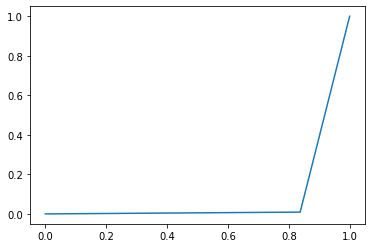

In [41]:
y_true = y_test_5
y_probas = y_pred_5
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show()

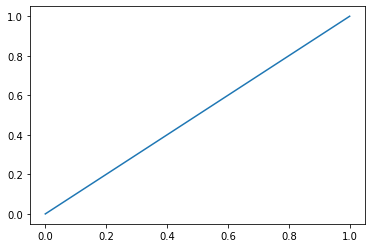

In [22]:
y_true = y_test_5
y_probas = y_pred_never_5
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

### Now find the roc_auc_score for each. 

In [23]:
y_true = y_test_5
y_probas = y_pred_5
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.08583446081008957


In [24]:
y_true = y_test_5
y_probas = y_pred_never_5
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?